# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [1]:
# Run this cell without changes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

In [3]:
heroes_df = pd.read_csv('heroes_information.csv', index_col=0)
# OR heroes_df =  heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


The following code checks that the dataframe was loaded correctly.

In [4]:
# Run this cell without changes

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == ['name', 'Gender', 'Eye color', 'Race',
 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [5]:
heroes_df.shape

(734, 10)

Now let's look at the info printout:

In [6]:
# Run this cell without changes
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [7]:
# Replace None with appropriate text
"""
Data types line up with what we expect. Height and weight are float, the rest are strings.
Publisher and Weight have some missing values. 
For skin color NA values are filled with "-" characters. 
"""

'\nData types line up with what we expect. Height and weight are float, the rest are strings.\nPublisher and Weight have some missing values. \nFor skin color NA values are filled with "-" characters. \n'

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [8]:
powers_df = pd.read_csv('super_hero_powers.csv',index_col=0)
powers_df.head()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


The following code will check if it was loaded correctly:

In [9]:
# Run this cell without changes

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == '3-D Man'

# The last column should be 'Zoom'
assert powers_df.columns[-1] == 'Zoom'

# The first index should be 'Agility'
assert powers_df.index[0] == 'Agility'

# The last index should be 'Omniscient'
assert powers_df.index[-1] == 'Omniscient'

## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [10]:
# Run this cell without changes
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(5, random_state=1)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [11]:
# Run this cell without changes
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(5, random_state=1)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


In [12]:
heroes_df["Publisher"].isna().sum() / len(heroes_df["Publisher"])

0.020435967302452316

What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [13]:
# Replace None with appropriate text
"""
Since there were only 15 missing values out of 734 (2 percent), I decided to drop the rows with missing values. 
Also There is no other information in the data set from which we could infer the publisher info. 
"""

'\nSince there were only 15 missing values out of 734 (2 percent), I decided to drop the rows with missing values. \nAlso There is no other information in the data set from which we could infer the publisher info. \n'

Now, implement your chosen strategy using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [14]:
heroes_df.dropna(subset=['Publisher'], how='all', inplace = True)

If you choose to fillna with the mode do this:

In [15]:
# most_common = heroes_df["Publisher"].mode()[0]
# heroes_df["Publisher"] = heroes_df["Publisher"].fillna(most_common)

Now there should be no missing values in the publisher column:

In [16]:
# Run this cell without changes
assert heroes_df["Publisher"].isna().sum() == 0

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [17]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
Titan Books            1
Microsoft              1
Rebellion              1
Hanna-Barbera          1
J. K. Rowling          1
Universal Studios      1
South Park             1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [18]:
# Replace None with appropriate text
"""
Marvel Comics 
Marvel
 DC Comics
DC Comics
"""

'\nMarvel Comics \nMarvel\n DC Comics\nDC Comics\n'

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [19]:
heroes_df["Publisher"] = heroes_df["Publisher"].replace(to_replace='Marvel', value='Marvel Comics')
heroes_df["Publisher"].value_counts()

Marvel Comics        388
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
Microsoft              1
Titan Books            1
Rebellion              1
South Park             1
J. K. Rowling          1
Universal Studios      1
Hanna-Barbera          1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [20]:
# heroes_df["Publisher"] = heroes_df["Publisher"].apply(lambda x: x.strip())

# This is easier: 
heroes_df["Publisher"] = heroes_df["Publisher"].str.strip()
heroes_df["Publisher"].value_counts()


Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

Check your work below:

In [21]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

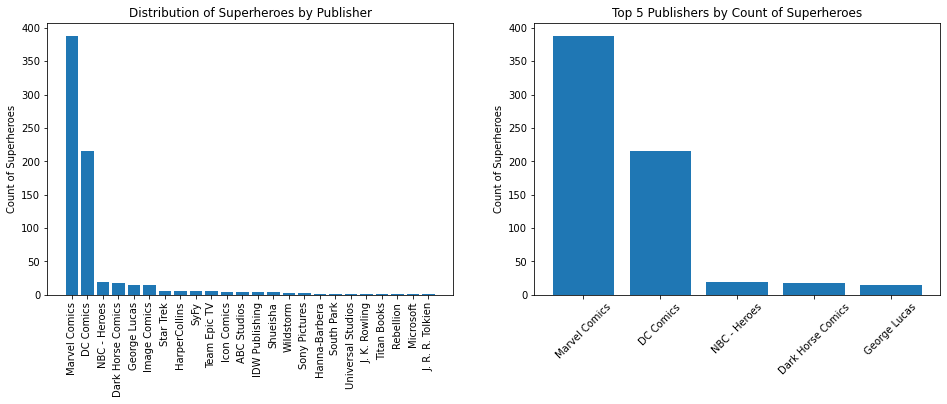

In [22]:
# Run this cell without changes

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [23]:
# Run this cell without changes
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [24]:
# Run this cell without changes
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [25]:
# Replace None with appropriate text
"""
"Name" column in superheroes_df and column names themselves in power_df are the shared keys.
We need to transpose powers_df to align with the first df. 
We will do "inner join" because there some superpower names not common to both. 
"""

'\n"Name" column in superheroes_df and column names themselves in power_df are the shared keys.\nWe need to transpose powers_df to align with the first df. \nWe will do "inner join" because there some superpower names not common to both. \n'

In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

In [26]:
# First, get a transposed version of the powers dataframe. 
# What used to be the row index is now the column name, and vice versa
powers_df_transposed = powers_df.T
powers_df_transposed

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Zatanna,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
powers_df_transposed.index.name = "name"
powers_df_transposed.reset_index(inplace=True)
powers_df_transposed

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
heroes_and_powers_df = heroes_df.merge(powers_df_transposed, how='inner', on='name')
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,False
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# you can use this of you do not reset the index etc.
# heroes_and_powers_df = heroes_df.merge(powers_df_transposed, how='inner', left_on='name', right_index= True)


Run the code below to check your work:

In [30]:
# Run this cell without changes

# Confirms you have created a dataframe with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you mgith need to 
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [31]:
# Run this cell without changes
# Note: we can use sum() with True and False values and they will automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum([heroes_and_powers_df[power_name] for power_name in powers_df.index])
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,3
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,6
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,19
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,8


In [32]:
# ANOTHER WAY TO DO THIS:
# heroes_and_powers_df["Power Count"] = heroes_and_powers_df.iloc[:, -167:-1].sum(axis=1)
# heroes_and_powers_df

### Answering the Question

Now we can plot the height vs. the count of powers:

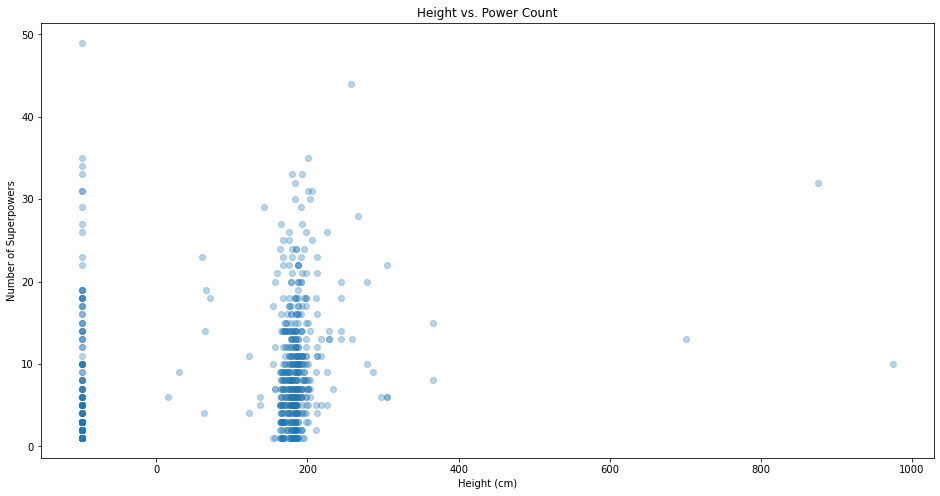

In [33]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"],
    y=heroes_and_powers_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [34]:
# Run this cell without changes
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
150,Chameleon,Male,-,-,-,-99.0,DC Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,1
163,Crimson Crusader,Male,blue,-,Strawberry Blond,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,4
364,Luna,Female,-,Human,-,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,1
315,JJ Powell,Male,-,-,-,-99.0,ABC Studios,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,1
630,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,7


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [35]:
# Run this cell without changes
question_2_df = heroes_and_powers_df[heroes_and_powers_df["Height"] != -99.0].copy()
question_2_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,3
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,6
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,19
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,8


### Answering the Question, Again

Now we can redo that plot without those negative heights:

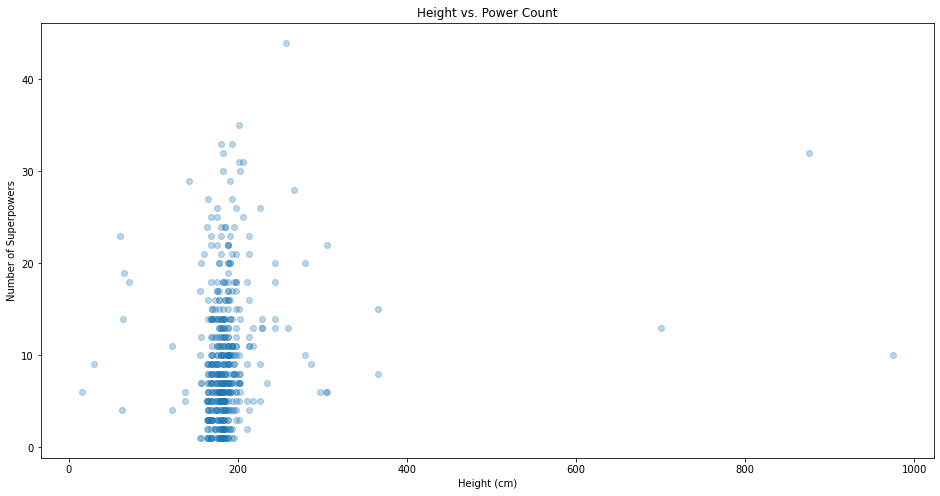

In [36]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=question_2_df["Height"],
    y=question_2_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

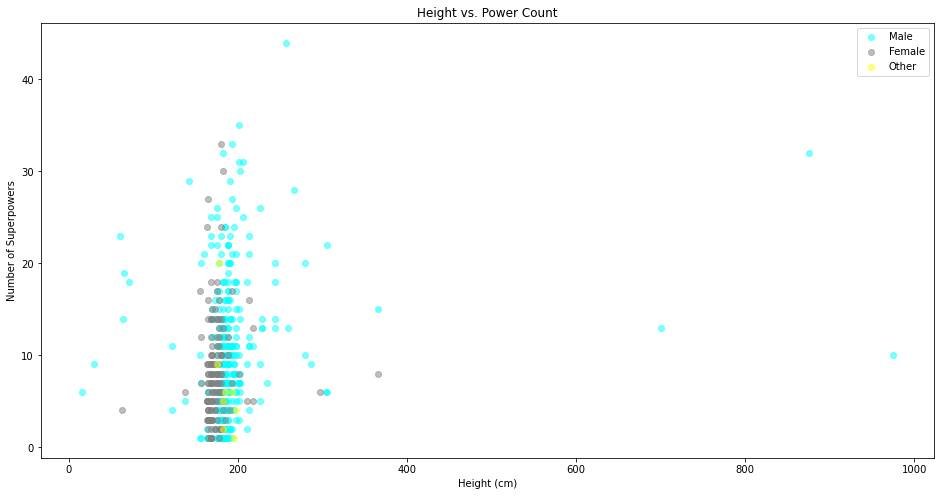

In [37]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[(question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male"
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female"
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other"
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

In [38]:
heroes_and_powers_df.head(3)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1


In [39]:
question_3_df = heroes_and_powers_df[
    (heroes_and_powers_df["Publisher"] == "Marvel Comics") | (heroes_and_powers_df["Publisher"] == "DC Comics")]

In [40]:
question_3_df["Publisher"].value_counts()

Marvel Comics    341
DC Comics        196
Name: Publisher, dtype: int64

In [41]:
list(powers_df.index)

['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

In [42]:
columns_needed = list(powers_df.index)
columns_needed.append("Publisher")
columns_needed

['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

In [43]:
question_3_df = question_3_df[columns_needed]
question_3_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Publisher
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,DC Comics
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
4,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
5,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics


In [44]:
question_3_df = question_3_df.groupby("Publisher").sum()
question_3_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Publisher,,,,,,,,,,,,,,,,,,,,,
DC Comics,71,51,11,7,15,71,48,30,86,3,...,0,3,0,1,1,0,1,1,0,0
Marvel Comics,126,100,0,16,25,154,47,43,111,20,...,16,8,2,8,0,1,0,0,1,1


In [45]:
question_3_df = question_3_df.T
question_3_df

Publisher,DC Comics,Marvel Comics
Agility,71,126
Accelerated Healing,51,100
Lantern Power Ring,11,0
Dimensional Awareness,7,16
Cold Resistance,15,25
...,...,...
Phoenix Force,0,1
Molecular Dissipation,1,0
Vision - Cryo,1,0
Omnipresent,0,1


In [46]:
question_3_df.index.name = "Superpower Name"

In [47]:
question_3_df.reset_index(inplace=True)

In [48]:
question_3_df.head()

Publisher,Superpower Name,DC Comics,Marvel Comics
0,Agility,71,126
1,Accelerated Healing,51,100
2,Lantern Power Ring,11,0
3,Dimensional Awareness,7,16
4,Cold Resistance,15,25


In [49]:
# name of the column levels
question_3_df.columns.name

'Publisher'

In [50]:
question_3_df.index.name

In [51]:
question_3_df.columns.name = None

In [52]:
question_3_df

,Superpower Name,DC Comics,Marvel Comics
0,Agility,71,126
1,Accelerated Healing,51,100
2,Lantern Power Ring,11,0
3,Dimensional Awareness,7,16
4,Cold Resistance,15,25
...,...,...,...
162,Phoenix Force,0,1
163,Molecular Dissipation,1,0
164,Vision - Cryo,1,0
165,Omnipresent,0,1


The code below checks that you have the correct dataframe structure:

In [53]:
# Run this cell without changes

# Checking that you made a dataframe called question_3_df
assert type(question_3_df) == pd.DataFrame

# Checking the shape
assert question_3_df.shape == (167, 3)

# Checking the column names
assert sorted(list(question_3_df.columns)) == ['DC Comics', 'Marvel Comics', 'Superpower Name']

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [54]:
# Run this cell without changes

marvel_most_common = question_3_df.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(by="Marvel Comics", ascending=False)[:5]
marvel_most_common

,Superpower Name,Marvel Comics
17,Super Strength,204
5,Durability,154
25,Stamina,150
30,Super Speed,137
0,Agility,126


In [55]:
# Run this cell without changes

dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

,Superpower Name,DC Comics
17,Super Strength,109
25,Stamina,90
8,Flight,86
30,Super Speed,79
5,Durability,71


In [56]:
marvel_most_common["Marvel Comics"]

17    204
5     154
25    150
30    137
0     126
Name: Marvel Comics, dtype: int64

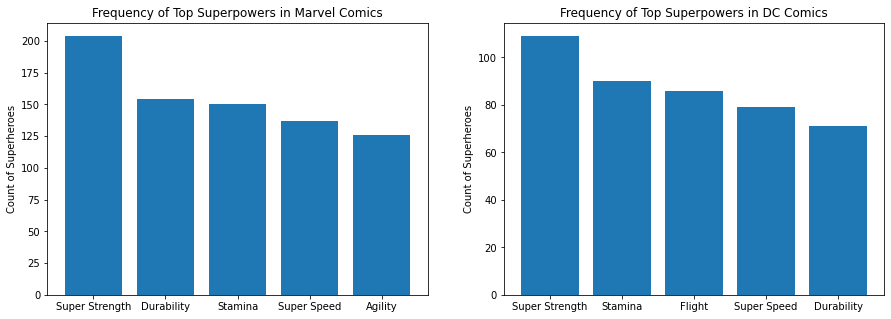

In [57]:
# Run this cell without changes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"],
    height=marvel_most_common["Marvel Comics"]
)
ax2.bar(
    x=dc_most_common["Superpower Name"],
    height=dc_most_common["DC Comics"]
)

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

**How are race and gender of the heroes related to total number of superpowers? 
For example, one could expect god race to have more super powers than a human race. 
Similarly male heroes could have more superpowers than female heroes.
PS: Since There are many races with small counts we will only focus on top three races with the highest counts.**

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

In [58]:
race_gender_topowers = heroes_and_powers_df.copy()

In [59]:
race_gender_topowers['Race'].value_counts().head(10)

-                    242
Human                191
Mutant                61
God / Eternal         14
Human / Radiation     11
Cyborg                10
Android                9
Symbiote               8
Kryptonian             7
Alien                  7
Name: Race, dtype: int64

In [60]:
race_gender_topowers['Gender'].value_counts()

Male      454
Female    176
-          17
Name: Gender, dtype: int64

In [61]:
race_gender_topowers = race_gender_topowers[(race_gender_topowers['Race'] == 'Human')|
                                        (race_gender_topowers['Race'] == 'Mutant')|
                                        (race_gender_topowers['Race'] == 'God / Eternal')]
                              
race_gender_topowers['Race'].value_counts()                        

Human            191
Mutant            61
God / Eternal     14
Name: Race, dtype: int64

In [62]:
to_drop = race_gender_topowers[race_gender_topowers['Gender'] == '-']
race_gender_topowers.drop(to_drop.index, axis = 0, inplace = True)

In [63]:
race_gender_topowers['Gender'].value_counts()

Male      196
Female     67
Name: Gender, dtype: int64

In [64]:
race_gender_topowers.reset_index().head()

,index,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,7
1,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,11
2,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,...,False,False,False,False,False,False,False,False,False,10
3,8,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,1
4,13,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,...,False,False,False,False,False,False,False,False,False,27


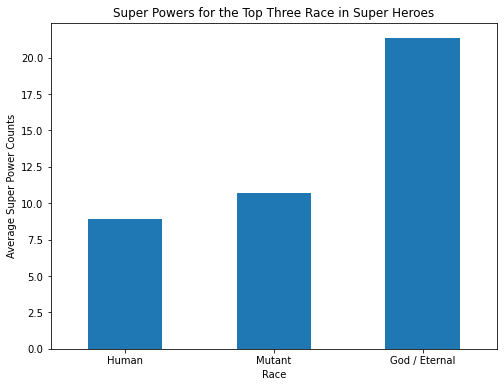

In [65]:
race_gender_topowers.groupby('Race')['Power Count'].mean().sort_values().plot( 
    kind = 'bar', figsize = (8,6),  title = 'Super Powers for the Top Three Race in Super Heroes', 
    ylabel = 'Average Super Power Counts', rot =0);

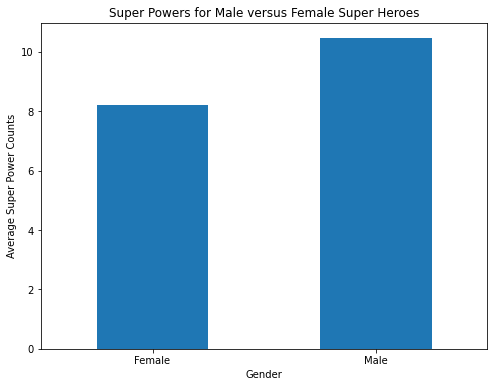

In [66]:
race_gender_topowers.groupby('Gender')['Power Count'].mean().sort_values().plot( 
    kind = 'bar', figsize = (8,6),  title = 'Super Powers for Male versus Female Super Heroes', 
    ylabel = 'Average Super Power Counts', rot = 0);

In [67]:
mean_superpower_races = race_gender_topowers.groupby('Race')['Power Count'].mean().sort_values()
mean_superpower_gender = race_gender_topowers.groupby('Gender')['Power Count'].mean().sort_values()

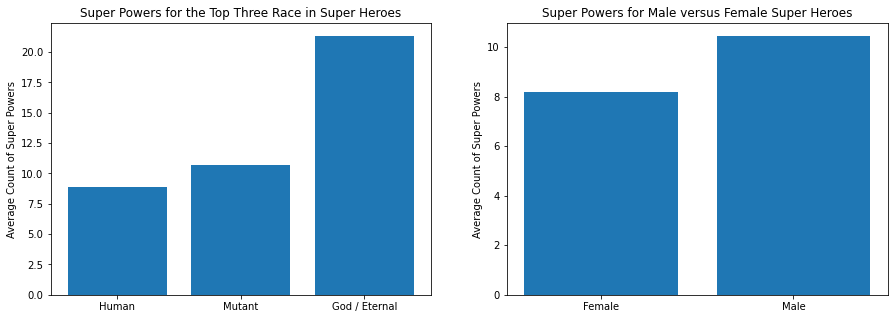

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=mean_superpower_races.index,
    height=mean_superpower_races
)
ax2.bar(
    x=mean_superpower_gender.index,
    height=mean_superpower_gender
)
 
ax1.set_ylabel("Average Count of Super Powers")
ax2.set_ylabel("Average Count of Super Powers")
ax1.set_title("Super Powers for the Top Three Race in Super Heroes")
ax2.set_title("Super Powers for Male versus Female Super Heroes");

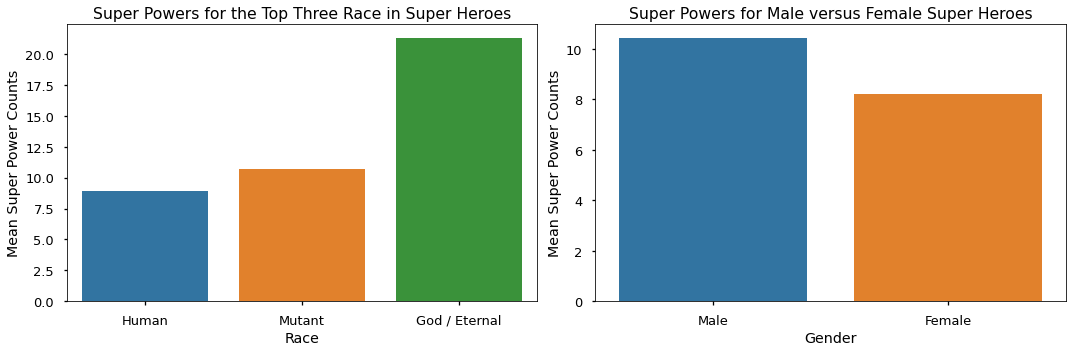

In [101]:
with plt.style.context('seaborn-talk'):  # seaborn-poster
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    sns.barplot(data=race_gender_topowers, x='Race', y='Power Count', ci = None, ax=ax1)
    sns.barplot(data=race_gender_topowers, x='Gender', y='Power Count', ci = None, ax=ax2)

    ax1.set_title('Super Powers for the Top Three Race in Super Heroes')
    ax2.set_title('Super Powers for Male versus Female Super Heroes')
    ax1.set_ylabel("Mean Super Power Counts")
    ax2.set_ylabel("Mean Super Power Counts")
    fig.tight_layout();

As expected God/Eternal Race had the highest number of superpowers on average followed by Mutant and Humans.
As expected Male also had higher number of superpowers on average compared to Females. 

**Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?**

In [70]:
cooccurring_powers =  powers_df.copy().T
cooccurring_powers.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
corrs = cooccurring_powers.corr()
corrs

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.256731,0.024704,0.031677,0.096830,0.132984,0.392603,0.039646,-0.019537,0.227412,...,0.107033,0.065107,0.072676,0.100934,0.051351,0.051351,-0.029240,0.072676,0.015647,0.015647
Accelerated Healing,0.256731,1.000000,-0.024898,0.130776,0.138495,0.239692,0.098497,0.153284,0.134115,0.228862,...,0.195400,0.149085,0.090897,0.164466,0.064225,-0.023379,0.064225,0.090897,0.090897,0.090897
Lantern Power Ring,0.024704,-0.024898,1.000000,-0.025553,-0.035653,-0.005766,-0.062493,-0.046780,0.139143,-0.028102,...,-0.018961,-0.020301,-0.007101,-0.015144,-0.005018,-0.005018,-0.005018,-0.007101,-0.007101,-0.007101
Dimensional Awareness,0.031677,0.130776,-0.025553,1.000000,-0.054332,-0.042700,0.045924,0.126320,0.136529,0.033346,...,0.026170,0.536517,-0.010822,0.045337,-0.007647,-0.007647,-0.007647,-0.010822,0.277908,0.277908
Cold Resistance,0.096830,0.138495,-0.035653,-0.054332,1.000000,0.263499,0.061680,0.047190,-0.049550,-0.003221,...,-0.040314,-0.004879,-0.015099,0.018574,-0.010669,-0.010669,-0.010669,-0.015099,-0.015099,-0.015099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,0.051351,-0.023379,-0.005018,-0.007647,-0.010669,-0.030679,-0.018700,0.107261,-0.026450,-0.008409,...,-0.005674,-0.006075,-0.002125,-0.004532,-0.001502,1.000000,-0.001502,-0.002125,-0.002125,-0.002125
Molecular Dissipation,-0.029240,0.064225,-0.005018,-0.007647,-0.010669,0.048943,-0.018700,0.107261,0.056768,-0.008409,...,-0.005674,-0.006075,-0.002125,-0.004532,-0.001502,-0.001502,1.000000,-0.002125,-0.002125,-0.002125
Vision - Cryo,0.072676,0.090897,-0.007101,-0.010822,-0.015099,0.069268,-0.026466,0.151805,0.080342,-0.011901,...,-0.008030,-0.008598,-0.003008,-0.006414,-0.002125,-0.002125,-0.002125,1.000000,-0.003008,-0.003008
Omnipresent,0.015647,0.090897,-0.007101,0.277908,-0.015099,0.012924,-0.026466,0.151805,0.021454,0.120402,...,-0.008030,0.349812,-0.003008,-0.006414,-0.002125,-0.002125,-0.002125,-0.003008,1.000000,1.000000


In [72]:
corrs = corrs.unstack().sort_values()
corrs

Weapons Master        Flight                 -0.162434
Flight                Weapons Master         -0.162434
Peak Human Condition  Super Strength         -0.147921
Super Strength        Peak Human Condition   -0.147921
Weapons Master        Super Strength         -0.137696
                                                ...   
Illusions             Illusions               1.000000
Enhanced Smell        Enhanced Smell          1.000000
Time Travel           Time Travel             1.000000
Changing Armor        Changing Armor          1.000000
Omniscient            Omniscient              1.000000
Length: 27889, dtype: float64

In [73]:
corrs  = corrs[(corrs.values != 1)]
corrs

Weapons Master        Flight                 -0.162434
Flight                Weapons Master         -0.162434
Peak Human Condition  Super Strength         -0.147921
Super Strength        Peak Human Condition   -0.147921
Weapons Master        Super Strength         -0.137696
                                                ...   
Vision - Microscopic  Vision - X-Ray          0.659125
Vision - X-Ray        Vision - Heat           0.659125
Vision - Heat         Vision - X-Ray          0.659125
Melting               Intuitive aptitude      0.706576
Intuitive aptitude    Melting                 0.706576
Length: 27718, dtype: float64

In [74]:
corrs = corrs.tail(20)
corrs.drop_duplicates(inplace= True)
corrs

Astral Projection  Illusions               0.581948
Web Creation       Wallcrawling            0.584234
Cold Resistance    Heat Resistance         0.595626
Time Manipulation  Time Travel             0.608488
Super Breath       Vision - Heat           0.609733
                   Vision - Microscopic    0.609733
Vision - Heat      Vision - Microscopic    0.620776
Vision - X-Ray     Vision - Microscopic    0.659125
                   Vision - Heat           0.659125
Melting            Intuitive aptitude      0.706576
dtype: float64

In [105]:
corrs.reset_index()

,level_0,level_1,0
0,Astral Projection,Illusions,0.581948
1,Web Creation,Wallcrawling,0.584234
2,Cold Resistance,Heat Resistance,0.595626
3,Time Manipulation,Time Travel,0.608488
4,Super Breath,Vision - Heat,0.609733
5,Super Breath,Vision - Microscopic,0.609733
6,Vision - Heat,Vision - Microscopic,0.620776
7,Vision - X-Ray,Vision - Microscopic,0.659125
8,Vision - X-Ray,Vision - Heat,0.659125
9,Melting,Intuitive aptitude,0.706576


In [75]:
corrs.dtype

dtype('float64')

In [76]:
corrs.values

array([0.58194774, 0.58423428, 0.59562558, 0.60848812, 0.60973301,
       0.60973301, 0.62077648, 0.65912479, 0.65912479, 0.70657572])

In [102]:
corrs.keys()

MultiIndex([('Astral Projection',            'Illusions'),
            (     'Web Creation',         'Wallcrawling'),
            (  'Cold Resistance',      'Heat Resistance'),
            ('Time Manipulation',          'Time Travel'),
            (     'Super Breath',        'Vision - Heat'),
            (     'Super Breath', 'Vision - Microscopic'),
            (    'Vision - Heat', 'Vision - Microscopic'),
            (   'Vision - X-Ray', 'Vision - Microscopic'),
            (   'Vision - X-Ray',        'Vision - Heat'),
            (          'Melting',   'Intuitive aptitude')],
           )

In [78]:
# use this to convert to a dataframe (necessary for SNS?) but not sure how to rename te columns
# df = pd.DataFrame(corrs)
# df.reset_index()
# df

In [79]:
print(corrs.index)
print(corrs.values)

MultiIndex([('Astral Projection',            'Illusions'),
            (     'Web Creation',         'Wallcrawling'),
            (  'Cold Resistance',      'Heat Resistance'),
            ('Time Manipulation',          'Time Travel'),
            (     'Super Breath',        'Vision - Heat'),
            (     'Super Breath', 'Vision - Microscopic'),
            (    'Vision - Heat', 'Vision - Microscopic'),
            (   'Vision - X-Ray', 'Vision - Microscopic'),
            (   'Vision - X-Ray',        'Vision - Heat'),
            (          'Melting',   'Intuitive aptitude')],
           )
[0.58194774 0.58423428 0.59562558 0.60848812 0.60973301 0.60973301
 0.62077648 0.65912479 0.65912479 0.70657572]


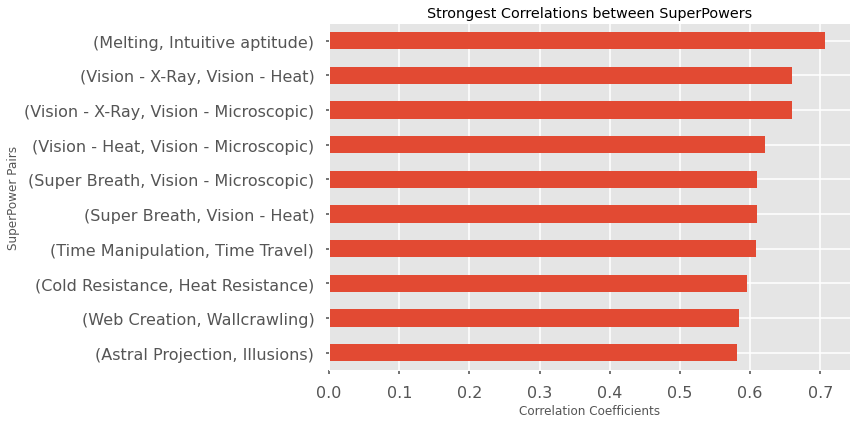

In [104]:
with plt.style.context(['seaborn-poster','ggplot']):
    fig, ax = plt.subplots(figsize=(12,6))
    ax = corrs.plot.barh();
    ax.set_title('Strongest Correlations between SuperPowers');
    ax.set_xlabel('Correlation Coefficients');
    ax.set_ylabel('SuperPower Pairs');
    fig.tight_layout()

The highest correlation is between Melting and Intuitive aptitude, so these two super powers co-occur in a hero the MOST

**What is the distribution of skin colors amongst alien heroes?**


In [81]:
heroes_df['Race'].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Saiyan', 'Gorilla', 'Rodian',
       'Flora Colossus', 'Human-Vuldarian', 'Asgardian', 'Demi-God',
       'Eternal', 'Gungan', 'Bolovaxian', 'Animal', 'Czarnian', 'Martian',
       'Spartoi', 'Planet', 'Luphomoid', 'Parademon', 'Yautja', 'Maiar',
       'Clone', 'Talokite', 'Korugaran', 'Zombie', 'Human-Vulcan',
       'Human-Spartoi', 'Tamaranean', 'Frost Giant', 'Mutant / Clone',
       "Yoda's species"], dtype=object)

In [82]:
aliens_df = heroes_df[heroes_df['Race'] == 'Alien']
aliens_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
41,Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
110,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,-,-,88.0
166,Century,Male,white,Alien,White,201.0,Marvel Comics,grey,good,97.0
229,Doomsday,Male,red,Alien,White,244.0,DC Comics,-,bad,412.0
247,Evilhawk,Male,red,Alien,Black,191.0,Marvel Comics,green,bad,106.0
341,Indigo,Female,-,Alien,Purple,-99.0,DC Comics,-,neutral,-99.0
600,Silver Surfer,Male,white,Alien,No Hair,193.0,Marvel Comics,silver,good,101.0


In [83]:
aliens_df = heroes_df[~((heroes_df['Race'] == 'Human') |
                      (heroes_df['Race'] == 'Human / Radiation') |
                      (heroes_df['Race'] == '-'))]
aliens_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
12,Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,-,bad,90.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
...,...,...,...,...,...,...,...,...,...,...
720,Wonder Girl,Female,blue,Demi-God,Blond,165.0,DC Comics,-,good,51.0
722,Wonder Woman,Female,blue,Amazon,Black,183.0,DC Comics,-,good,74.0
725,X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,-,good,50.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0


In [84]:
# or
# aliens_df = heroes_df[((heroes_df['Race'] != 'Human') &
#                       (heroes_df['Race'] != 'Human / Radiation') &
#                       (heroes_df['Race'] != '-'))]
# aliens_df

In [85]:
aliens_df['Race'].unique()

array(['Icthyo Sapien', 'Ungaran', 'Cosmic Entity', 'Cyborg',
       'Xenomorph XX121', 'Android', 'Vampire', 'Mutant', 'God / Eternal',
       'Symbiote', 'Atlantean', 'Alien', 'Neyaphem', 'New God', 'Alpha',
       'Bizarro', 'Inhuman', 'Metahuman', 'Demon', 'Human / Clone',
       'Human-Kree', 'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Saiyan', 'Gorilla', 'Rodian',
       'Flora Colossus', 'Human-Vuldarian', 'Asgardian', 'Demi-God',
       'Eternal', 'Gungan', 'Bolovaxian', 'Animal', 'Czarnian', 'Martian',
       'Spartoi', 'Planet', 'Luphomoid', 'Parademon', 'Yautja', 'Maiar',
       'Clone', 'Talokite', 'Korugaran', 'Zombie', 'Human-Vulcan',
       'Human-Spartoi', 'Tamaranean', 'Frost Giant', 'Mutant / Clone',
       "Yoda's species"], dtype=object)

In [86]:
aliens_df = heroes_df[heroes_df['Skin color'] != '-' ]
aliens_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
34,Apocalypse,Male,red,Mutant,Black,213.0,Marvel Comics,grey,bad,135.0
39,Archangel,Male,blue,Mutant,Blond,183.0,Marvel Comics,blue,good,68.0
...,...,...,...,...,...,...,...,...,...,...
679,Triton,Male,green,Inhuman,No Hair,188.0,Marvel Comics,green,good,86.0
682,Ultron,Male,red,Android,-,206.0,Marvel Comics,silver,bad,331.0
699,Vision,Male,gold,Android,No Hair,191.0,Marvel Comics,red,good,135.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0


In [87]:
aliens_df['Skin color'].unique()

array(['blue', 'red', 'black', 'grey', 'gold', 'green', 'white', 'pink',
       'silver', 'red / black', 'yellow', 'purple', 'orange / white',
       'gray', 'blue-white', 'orange'], dtype=object)

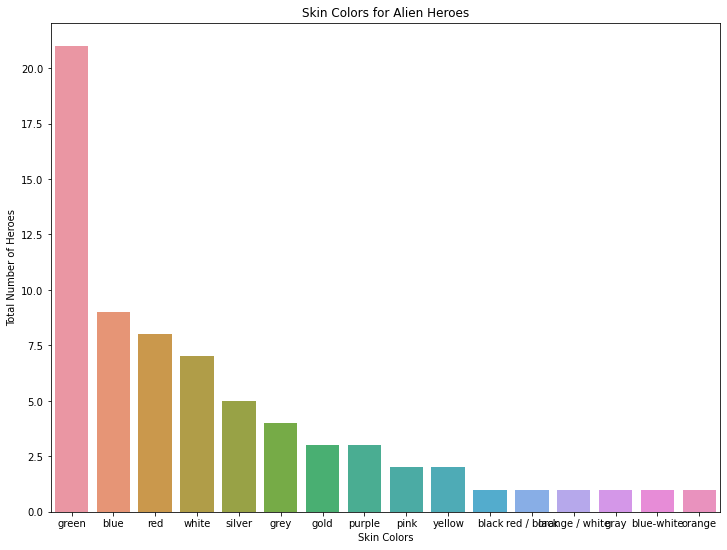

In [88]:
# hist? but I could not order values in sns with histplot
fig, ax = plt.subplots(figsize=(12,9))
sns.countplot(data=aliens_df, x='Skin color', order = aliens_df['Skin color'].value_counts().index);

ax.set_title('Skin Colors for Alien Heroes');
ax.set_xlabel('Skin Colors');
ax.set_ylabel('Total Number of Heroes');


**How are eye color and hair color related in this dataset?**

In [89]:
eye_hair_df = heroes_df[['Eye color', 'Hair color']]
eye_hair_df

,Eye color,Hair color
0,yellow,No Hair
1,blue,No Hair
2,blue,No Hair
3,green,No Hair
4,blue,Black
...,...,...
729,blue,Strawberry Blond
730,white,No Hair
731,brown,White
732,blue,Black


In [90]:
eye_hair_df['Eye color'].value_counts()

blue                       224
-                          163
brown                      123
green                       73
red                         46
black                       22
yellow                      18
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: Eye color, dtype: int64

In [91]:
eye_hair_df = eye_hair_df[eye_hair_df['Eye color'] != '-' ]
eye_hair_df['Eye color'].replace(to_replace='bown', value='brown', inplace=True)
eye_hair_df['Eye color'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


blue                       224
brown                      124
green                       73
red                         46
black                       22
yellow                      18
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
amber                        2
yellow (without irises)      2
white / red                  1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
yellow / blue                1
Name: Eye color, dtype: int64

In [92]:
eye_hair_df['Hair color'].value_counts()

Black               150
Blond                98
Brown                84
No Hair              70
Red                  49
White                22
-                    14
Auburn               13
Green                 8
Strawberry Blond      7
Grey                  5
Purple                4
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: Hair color, dtype: int64

In [93]:
eye_hair_df = eye_hair_df[eye_hair_df['Hair color'] != '-' ]
eye_hair_df['Hair color'].replace(to_replace='Brownn', value='Brown', inplace=True)
eye_hair_df['Hair color'].replace(to_replace='Auburn', value='Red', inplace=True)
eye_hair_df['Hair color'] = eye_hair_df['Hair color'].map(lambda x: x.lower())
eye_hair_df['Hair color'].value_counts()

black               153
blond               101
brown                85
no hair              70
red                  62
white                22
green                 8
strawberry blond      7
grey                  5
purple                4
brown / white         4
silver                4
blue                  3
yellow                2
orange                2
red / white           1
indigo                1
red / orange          1
gold                  1
magenta               1
orange / white        1
red / grey            1
brown / black         1
pink                  1
black / blue          1
Name: Hair color, dtype: int64

In [94]:
# eye_hair_df = eye_hair_df[((eye_hair_df['Hair color']=='black')|
#                                        (eye_hair_df['Hair color']=='blond')|
#                                        (eye_hair_df['Hair color']=='brown')|
#                                        (eye_hair_df['Hair color']=='no hair')|
#                                        (eye_hair_df['Hair color']=='red')|
#                                        (eye_hair_df['Hair color']=='white'))]
# eye_hair_df['Hair color']

In [95]:
# Shorter way!
counts = eye_hair_df['Hair color'].value_counts()
eye_hair_df = eye_hair_df[~eye_hair_df['Hair color'].isin(counts[counts < 20].index)]
eye_hair_df['Hair color'].value_counts()
# Another option: 
# eye_hair_df.groupby('Hair color').filter(lambda x : len(x)>20)

black      153
blond      101
brown       85
no hair     70
red         62
white       22
Name: Hair color, dtype: int64

In [96]:
counts2 = eye_hair_df['Eye color'].value_counts()
eye_hair_df = eye_hair_df[~eye_hair_df['Eye color'].isin(counts2[counts2 < 15].index)]
eye_hair_df['Eye color'].value_counts()

blue     204
brown    117
green     61
red       39
black     19
white     15
Name: Eye color, dtype: int64

In [97]:
pd.crosstab(eye_hair_df['Eye color'], eye_hair_df['Hair color'])

Hair color,black,blond,brown,no hair,red,white
Eye color,,,,,,
black,10,1,1,5,0,2
blue,47,87,19,16,24,11
brown,56,3,44,7,5,2
green,13,6,6,9,27,0
red,9,2,4,17,2,5
white,1,1,1,9,2,1


- Blue eyes and Blond hair go together most frequently, followed by
- Brown eyes and Black hair, followed by
- Blue eyes and Black hair, followed by
- Brown eyes and brown hair

## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!